In [1]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df=pd.read_csv('../../data/raw/airport.csv')
df.drop("To Date", axis=1, inplace=True)
df.head()

,From Date,NH3,SO2,CO,Ozone,Benzene,PM2.5,PM10,NO,NO2,NOx,Eth-Benzene,MP-Xylene,O,WS,WD,BP,AT
0,01-06-2019 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-06-2019 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-06-2019 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-06-2019 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2019 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# import pandas as pd

# # Replace 'input.csv' with the path to your CSV file
# input_file = 'input.csv'

# # Read the CSV file into a DataFrame
# df = pd.read_csv(input_file)

# # Replace all 'None' values with an empty string
# df = df.replace('None', '')

# # Replace 'output.csv' with the desired output file name
# output_file = 'output.csv'

# # Save the modified DataFrame to a new CSV file
# df.to_csv(output_file, index=False)

In [57]:
df=pd.read_csv('../../data/raw/cha.csv')
df.drop("To Date", axis=1, inplace=True)
df.head()

,From Date,Temp,RH,AT
0,01-12-2020 00:00,NaN,NaN,NaN
1,01-12-2020 01:00,NaN,NaN,NaN
2,01-12-2020 02:00,NaN,NaN,NaN
3,01-12-2020 03:00,NaN,NaN,NaN
4,01-12-2020 04:00,NaN,NaN,NaN


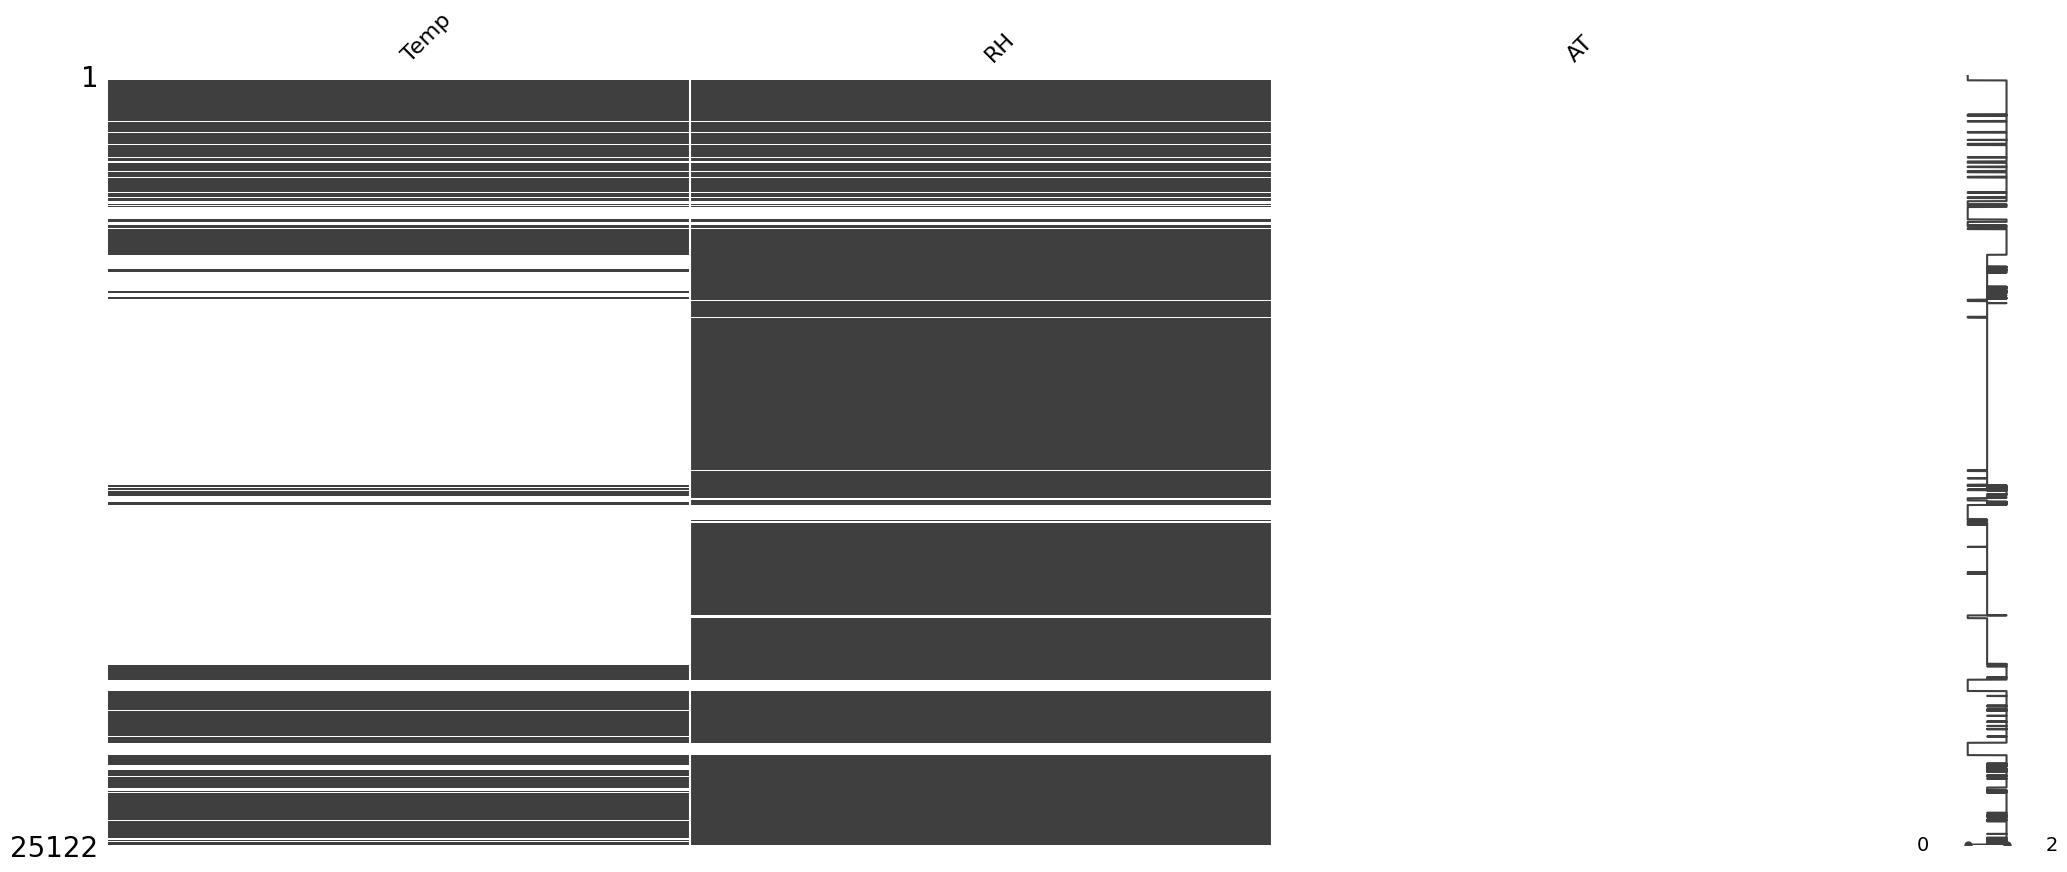

In [58]:
msno.matrix(df.iloc[:,1:])
plt.show()

In [47]:
df.drop("BP", axis=1, inplace=True)

KeyError: "['BP'] not found in axis"

<AxesSubplot:>

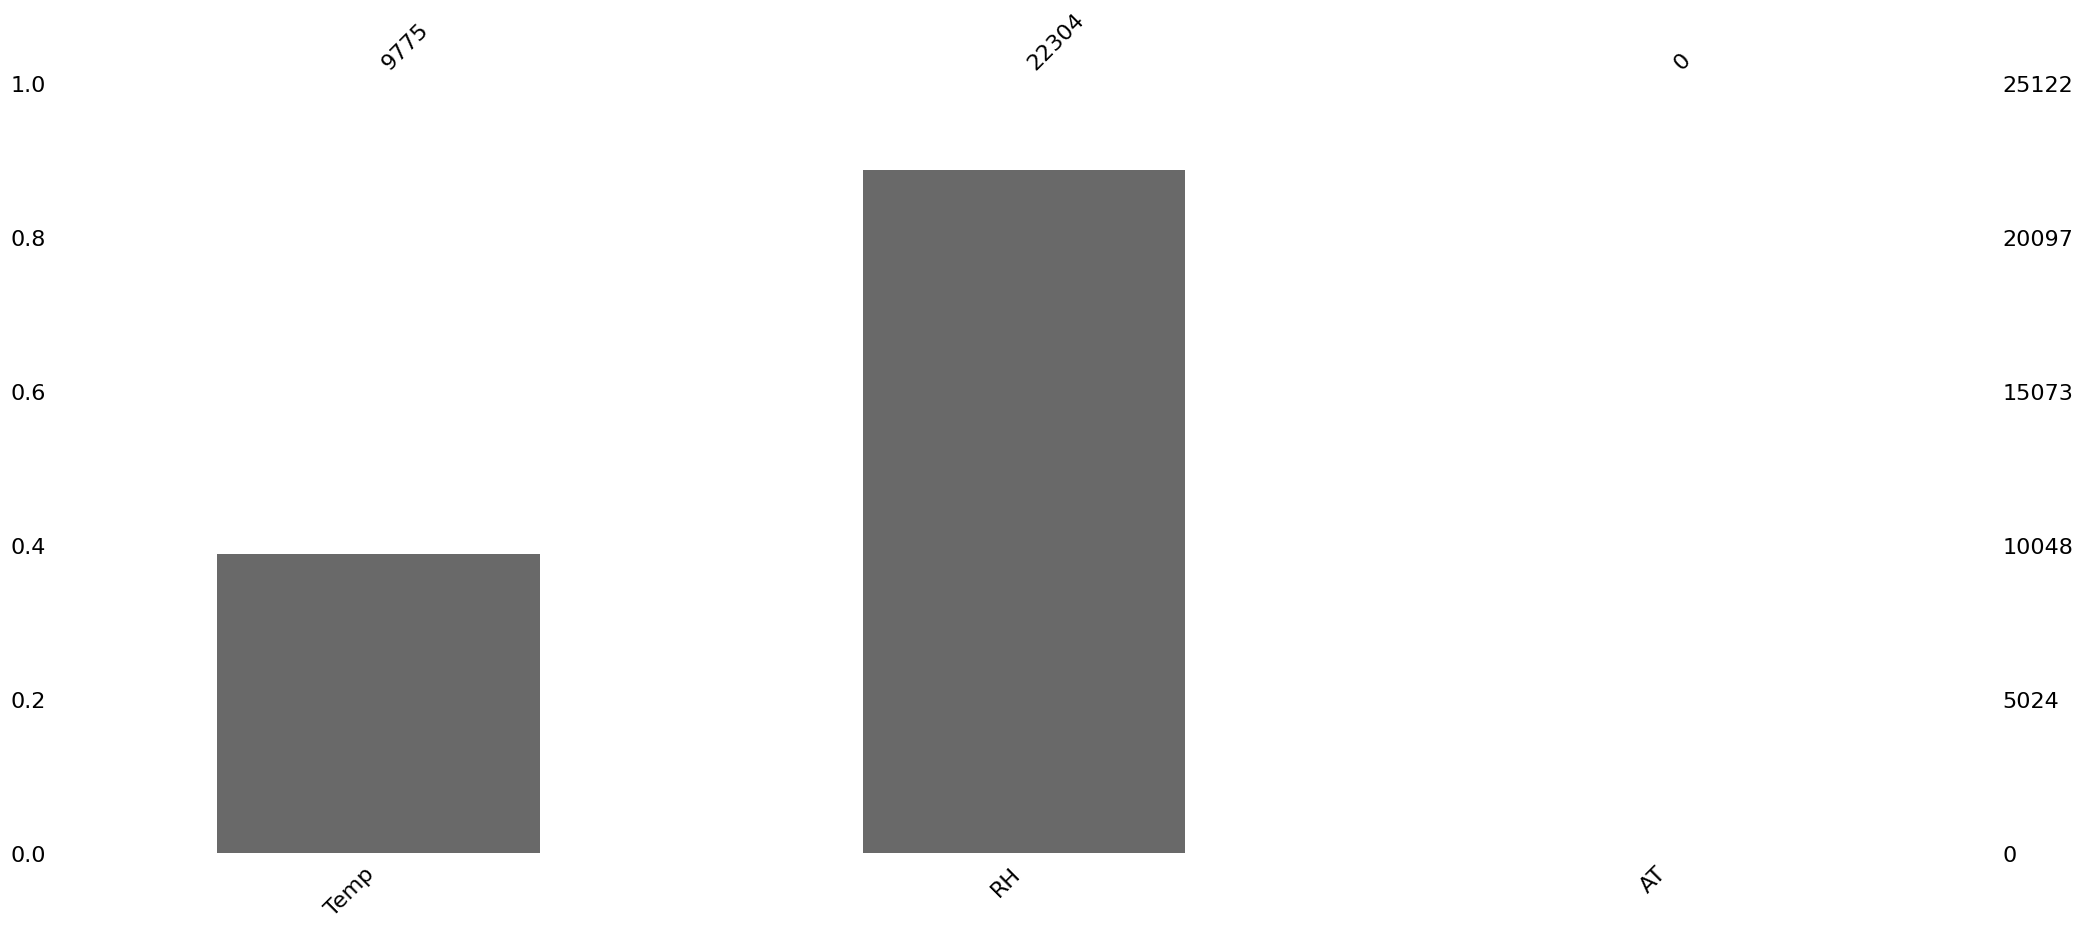

In [59]:
msno.bar(df.iloc[:,1:])

In [60]:
df['HOUR']=df['From Date'].apply(lambda x: int(x.split(' ')[1][:2]))
df.HOUR.head()

0    0
1    1
2    2
3    3
4    4
Name: HOUR, dtype: int64

In [61]:
df['From Date'] = pd.to_datetime(df['From Date'], format = '%d-%m-%Y %H:%M')
df['From Date']

0       2020-12-01 00:00:00
1       2020-12-01 01:00:00
2       2020-12-01 02:00:00
3       2020-12-01 03:00:00
4       2020-12-01 04:00:00
                ...        
25117   2023-10-13 13:00:00
25118   2023-10-13 14:00:00
25119   2023-10-13 15:00:00
25120   2023-10-13 16:00:00
25121   2023-10-13 17:00:00
Name: From Date, Length: 25122, dtype: datetime64[ns]

In [62]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date        0
Temp         15347
RH            2818
AT           25122
HOUR             0
dtype: int64


In [63]:
df.set_index('From Date',inplace=True)

In [64]:
df['MONTH']=df.index.month     #Create month column (Run once)
df.reset_index(inplace=True)

In [65]:
# cols=['NH3','SO2','CO','Ozone','Benzene','PM2.5','PM10','NO','NO2','NOx','Eth-Benzene','MP-Xylene','O','WS','WD','AT']
cols=['AT','RH']
for col in cols:
  df[col]=df[col].fillna(df.groupby(['MONTH','HOUR'])[col].transform('mean'))

In [66]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date        0
Temp         15347
RH               0
AT           25122
HOUR             0
MONTH            0
dtype: int64


In [67]:
df.to_csv('../../data/processed/cha_cleaned.csv', index=False)